# UK  road accidents and safety data

### Description

Data contains information about the circumstances of personal injury road accidents in Great Britain in 2014. The statistics relate only to personal injury accidents on public roads that are reported to the police, and subsequently recorded, using the STATS19 accident reporting form. Information on damage-only accidents, with no human casualties or accidents on private roads or car parks are not included in this data.

### Importing the data

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("dark_background")
sns.set_style("darkgrid")
sns.set_palette(sns.color_palette("husl"))

In [1]:
df_acc= pd.read_csv('data/DfTRoadSafety_Accidents_2014.csv')
df_acc

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,201401BS70001,524600,179020,-0.206443,51.496345,1,3,2,1,09/01/2014,...,0,0,1,2,2,0,0,1,2,E01002814
1,201401BS70002,525780,178290,-0.189713,51.489523,1,3,2,1,20/01/2014,...,0,5,7,1,1,0,0,1,2,E01002894
2,201401BS70003,526880,178430,-0.173827,51.490536,1,3,2,1,21/01/2014,...,0,0,1,1,1,0,0,1,1,E01002822
3,201401BS70004,525580,179080,-0.192311,51.496668,1,3,1,1,15/01/2014,...,0,1,4,1,1,0,0,1,2,E01002812
4,201401BS70006,527040,179030,-0.171308,51.495892,1,3,2,1,09/01/2014,...,0,8,1,1,1,0,0,1,1,E01002821
5,201401BS70008,524750,178970,-0.204301,51.495863,1,3,3,1,17/01/2014,...,0,0,1,1,1,0,0,1,1,E01002814
6,201401BS70009,524950,179240,-0.201326,51.498245,1,3,2,1,10/01/2014,...,0,0,4,1,2,0,0,1,1,E01002817
7,201401BS70010,523850,181450,-0.216389,51.518349,1,3,2,1,30/01/2014,...,0,8,4,2,2,0,0,1,1,E01002909
8,201401BS70011,524500,180260,-0.207445,51.507511,1,3,2,1,10/01/2014,...,0,0,1,1,1,0,0,1,1,E01002871
9,201401BS70013,526450,179230,-0.179731,51.497822,1,3,2,1,05/01/2014,...,0,0,4,2,2,0,0,1,1,E01002892


In [46]:
# check the Accident_Index is unique
len(df_acc.Accident_Index.unique())

146322

## Exploring the data

The -1's in the data correspond to NULL values, let's substitute and check for nulls

In [2]:
#first check if there are -1's in a string format 
df_acc.eq('-1').sum()

/Users/norayr/opt/anaconda3/envs/dev/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class      

In [3]:
#next check how many -1's are in the data and in which columns prediominantly
df_acc.eq(-1).sum()

Accident_Index                                     0
Location_Easting_OSGR                              0
Location_Northing_OSGR                             0
Longitude                                          0
Latitude                                           0
Police_Force                                       0
Accident_Severity                                  0
Number_of_Vehicles                                 0
Number_of_Casualties                               0
Date                                               0
Day_of_Week                                        0
Time                                               0
Local_Authority_(District)                         0
Local_Authority_(Highway)                          0
1st_Road_Class                                     0
1st_Road_Number                                    0
Road_Type                                          0
Speed_limit                                        0
Junction_Detail                               

In [4]:
# replace and check the replacemnet was correct
df_acc.replace(-1,np.nan, inplace=True)
df_acc.isna().sum()

Accident_Index                                     0
Location_Easting_OSGR                              0
Location_Northing_OSGR                             0
Longitude                                          0
Latitude                                           0
Police_Force                                       0
Accident_Severity                                  0
Number_of_Vehicles                                 0
Number_of_Casualties                               0
Date                                               0
Day_of_Week                                        0
Time                                               0
Local_Authority_(District)                         0
Local_Authority_(Highway)                          0
1st_Road_Class                                     0
1st_Road_Number                                    0
Road_Type                                          0
Speed_limit                                        0
Junction_Detail                               

The response variable does not have missing data, and there does not seemt to be bug data quality issues except in few columns. Let's chek the data balance:

In [5]:
#Check the third option is abscent 
#from the response variable (as noted in the variable description)
df_acc.Did_Police_Officer_Attend_Scene_of_Accident.unique()

array([2, 1])

In [6]:
# replace 2 with 0 for police not showing up 
df_acc.Did_Police_Officer_Attend_Scene_of_Accident.replace(2,0, inplace=True)

#check the imbalance
print (df_acc.Did_Police_Officer_Attend_Scene_of_Accident.eq(1).sum(),
       df_acc.Did_Police_Officer_Attend_Scene_of_Accident.eq(0).sum())
print ('Police attended in the {}% of cases'.format(round((df_acc.Did_Police_Officer_Attend_Scene_of_Accident.eq(0).sum()/
                                                      df_acc.Did_Police_Officer_Attend_Scene_of_Accident.eq(1).sum())
                                                     *100)))

119607 26715
Police attended in the 22.0% of cases


In [7]:
#Create the date time column
df_acc['dt'] = pd.to_datetime(df_acc.Date+' '+df_acc.Time)

In [8]:
df_acc['Month'] = df_acc.dt.dt.month 
df_acc['Hour'] = df_acc.dt.dt.hour
df_acc

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,dt,Month,Hour
0,201401BS70001,524600,179020,-0.206443,51.496345,1,3,2,1,09/01/2014,...,2,2.0,0.0,0.0,1,0,E01002814,2014-09-01 13:21:00,9,13
1,201401BS70002,525780,178290,-0.189713,51.489523,1,3,2,1,20/01/2014,...,1,1.0,0.0,0.0,1,0,E01002894,2014-01-20 23:00:00,1,23
2,201401BS70003,526880,178430,-0.173827,51.490536,1,3,2,1,21/01/2014,...,1,1.0,0.0,0.0,1,1,E01002822,2014-01-21 10:40:00,1,10
3,201401BS70004,525580,179080,-0.192311,51.496668,1,3,1,1,15/01/2014,...,1,1.0,0.0,0.0,1,0,E01002812,2014-01-15 17:45:00,1,17
4,201401BS70006,527040,179030,-0.171308,51.495892,1,3,2,1,09/01/2014,...,1,1.0,0.0,0.0,1,1,E01002821,2014-09-01 08:50:00,9,8
5,201401BS70008,524750,178970,-0.204301,51.495863,1,3,3,1,17/01/2014,...,1,1.0,0.0,0.0,1,1,E01002814,2014-01-17 14:11:00,1,14
6,201401BS70009,524950,179240,-0.201326,51.498245,1,3,2,1,10/01/2014,...,1,2.0,0.0,0.0,1,1,E01002817,2014-10-01 18:25:00,10,18
7,201401BS70010,523850,181450,-0.216389,51.518349,1,3,2,1,30/01/2014,...,2,2.0,0.0,0.0,1,1,E01002909,2014-01-30 17:50:00,1,17
8,201401BS70011,524500,180260,-0.207445,51.507511,1,3,2,1,10/01/2014,...,1,1.0,0.0,0.0,1,1,E01002871,2014-10-01 10:55:00,10,10
9,201401BS70013,526450,179230,-0.179731,51.497822,1,3,2,1,05/01/2014,...,2,2.0,0.0,0.0,1,1,E01002892,2014-05-01 20:26:00,5,20


#### Accident Severity

,Count
Fatal,1658
Serious,20676
Slight,123988


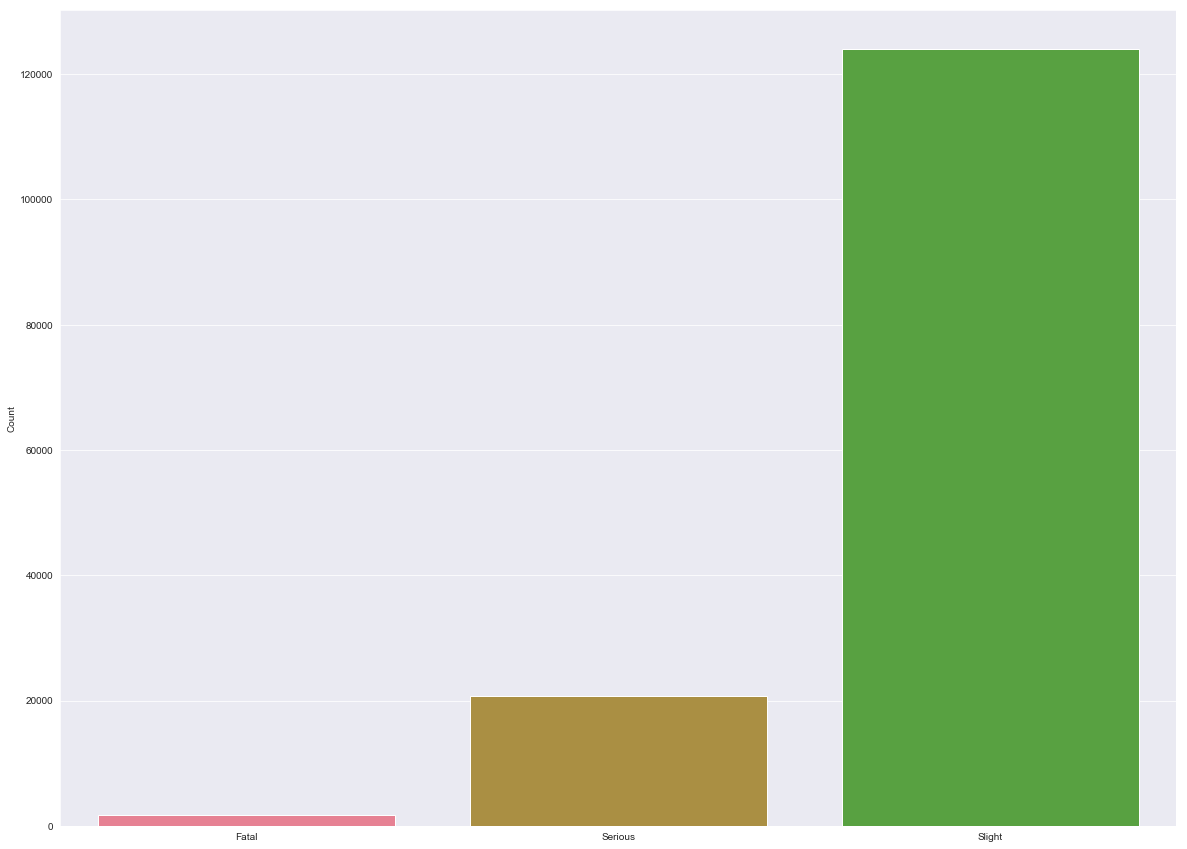

In [136]:
severeity=pd.DataFrame.from_dict(
    {'Fatal':df_acc.Accident_Severity.value_counts()[1],
             'Serious':df_acc.Accident_Severity.value_counts()[2], 
             'Slight':df_acc.Accident_Severity.value_counts()[3]},
    orient='index', columns=['Count'])

plt.figure(2, figsize=(20,15))
sns.barplot(x=severeity.index, y='Count',data=severeity)
severeity

,Accident_Severity,Did_Police_Officer_Attend_Scene_of_Accident,Accident_Index
0,Fatal,NO,20
1,Fatal,YES,1638
2,Serious,NO,1941
3,Serious,YES,18735
4,Slight,NO,24754
5,Slight,YES,99234


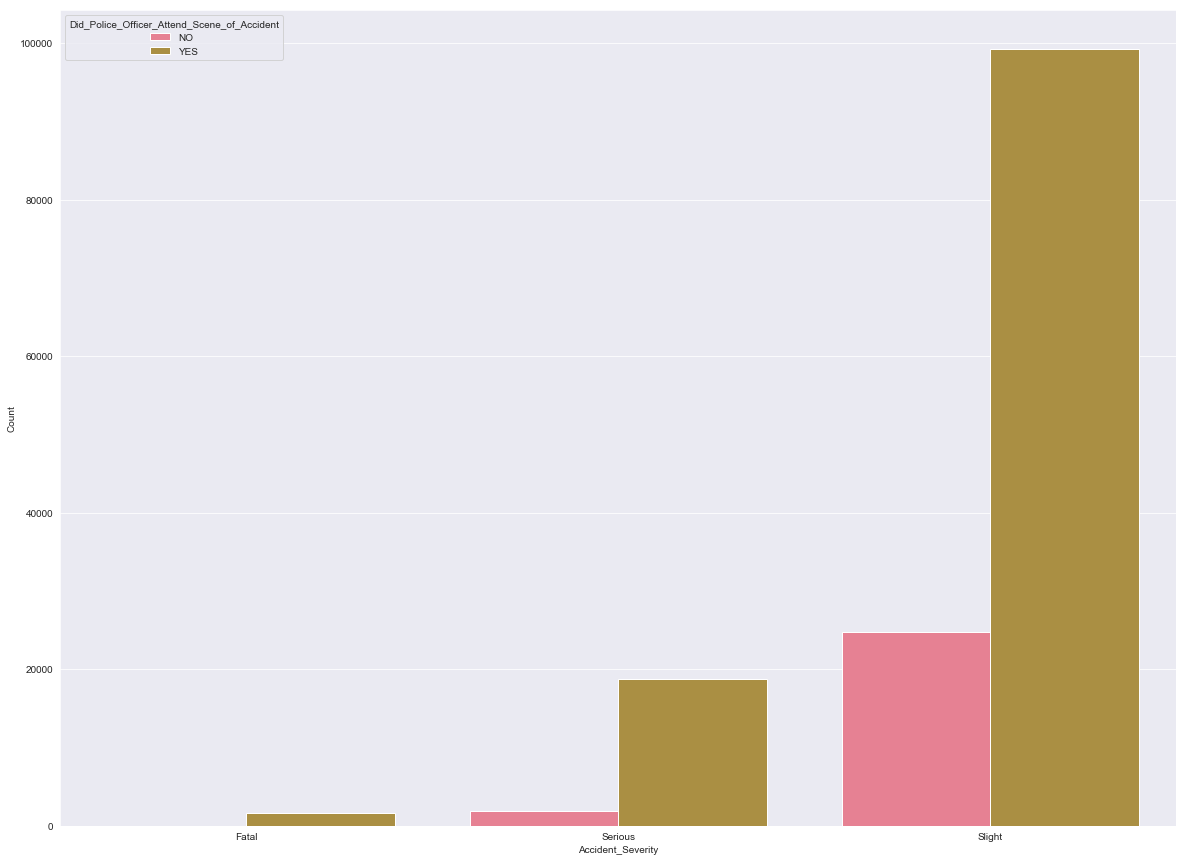

In [137]:
sever_by_attend=df_acc.replace({'Accident_Severity':{1:'Fatal',2:'Serious',3:'Slight'},
              'Did_Police_Officer_Attend_Scene_of_Accident':{0:'NO',1:'YES'}})[
    ['Accident_Severity','Did_Police_Officer_Attend_Scene_of_Accident','Accident_Index']].groupby(
      ['Accident_Severity','Did_Police_Officer_Attend_Scene_of_Accident']).count().reset_index()

plt.figure(2, figsize=(20,15))
sns.barplot(x='Accident_Severity', y='Accident_Index', 
            hue ='Did_Police_Officer_Attend_Scene_of_Accident',
            data=sever_by_attend)
plt.ylabel("Count")

sever_by_attend

#### Number_of_Casualties 

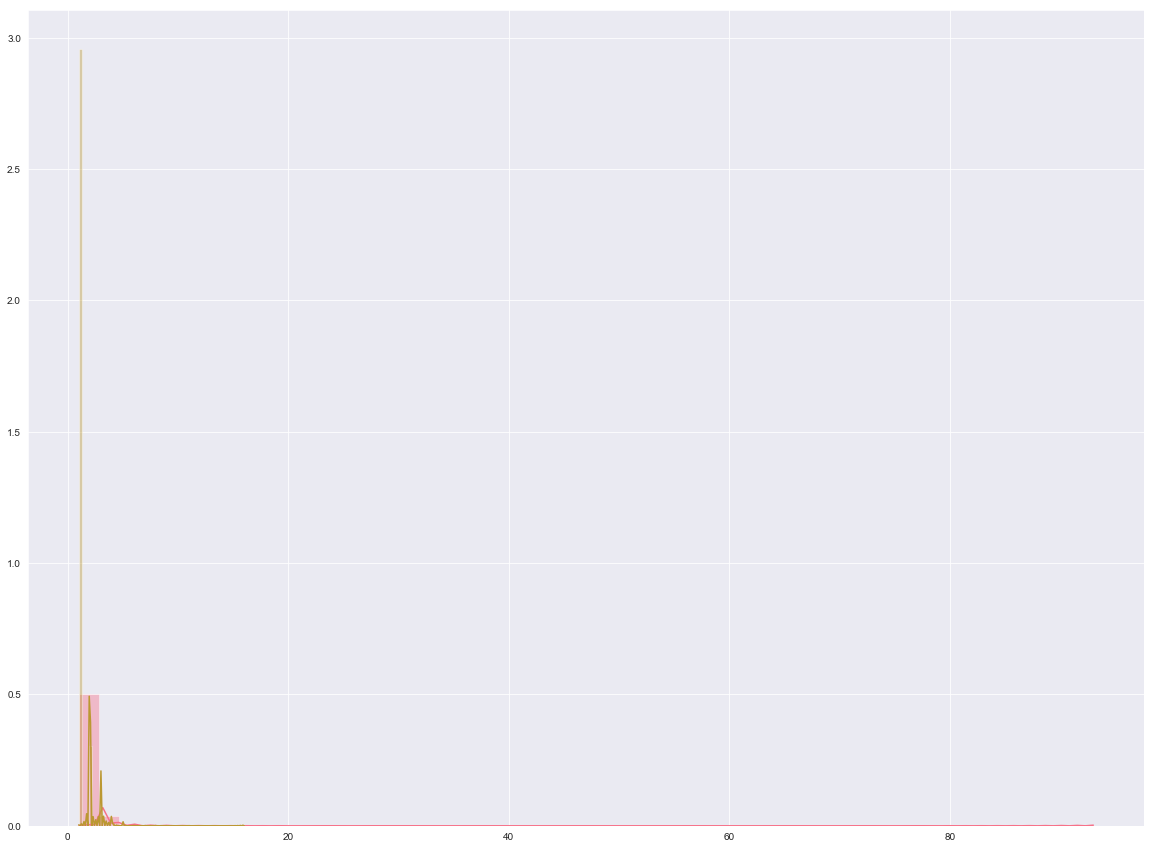

In [146]:
plt.figure(2, figsize=(20,15))
sns.distplot(df_acc.loc[df_acc.Did_Police_Officer_Attend_Scene_of_Accident == 1,
                        ['Number_of_Casualties']],bins=50,label="Attended")
sns.distplot(df_acc.loc[df_acc.Did_Police_Officer_Attend_Scene_of_Accident == 0,
                        ['Number_of_Casualties']],bins=50,label='Not Attended')

(-1, 10)

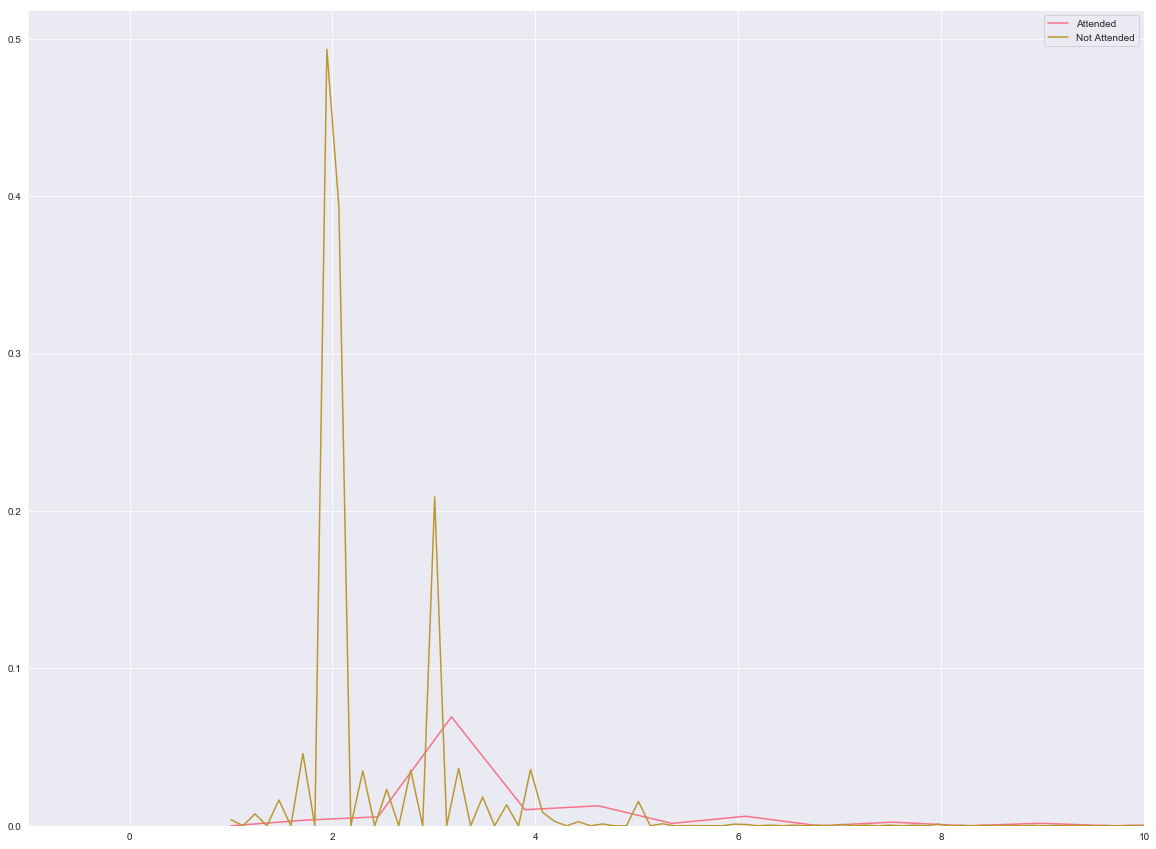

In [145]:
plt.figure(2, figsize=(20,15))
sns.distplot(df_acc.loc[df_acc.Did_Police_Officer_Attend_Scene_of_Accident == 1,
                        ['Number_of_Casualties']],bins=50,hist=False,label="Attended")
sns.distplot(df_acc.loc[df_acc.Did_Police_Officer_Attend_Scene_of_Accident == 0,
                        ['Number_of_Casualties']],bins=50,hist=False,label='Not Attended')
plt.xlim(-1, 10)


#### Number_of_Vehicles

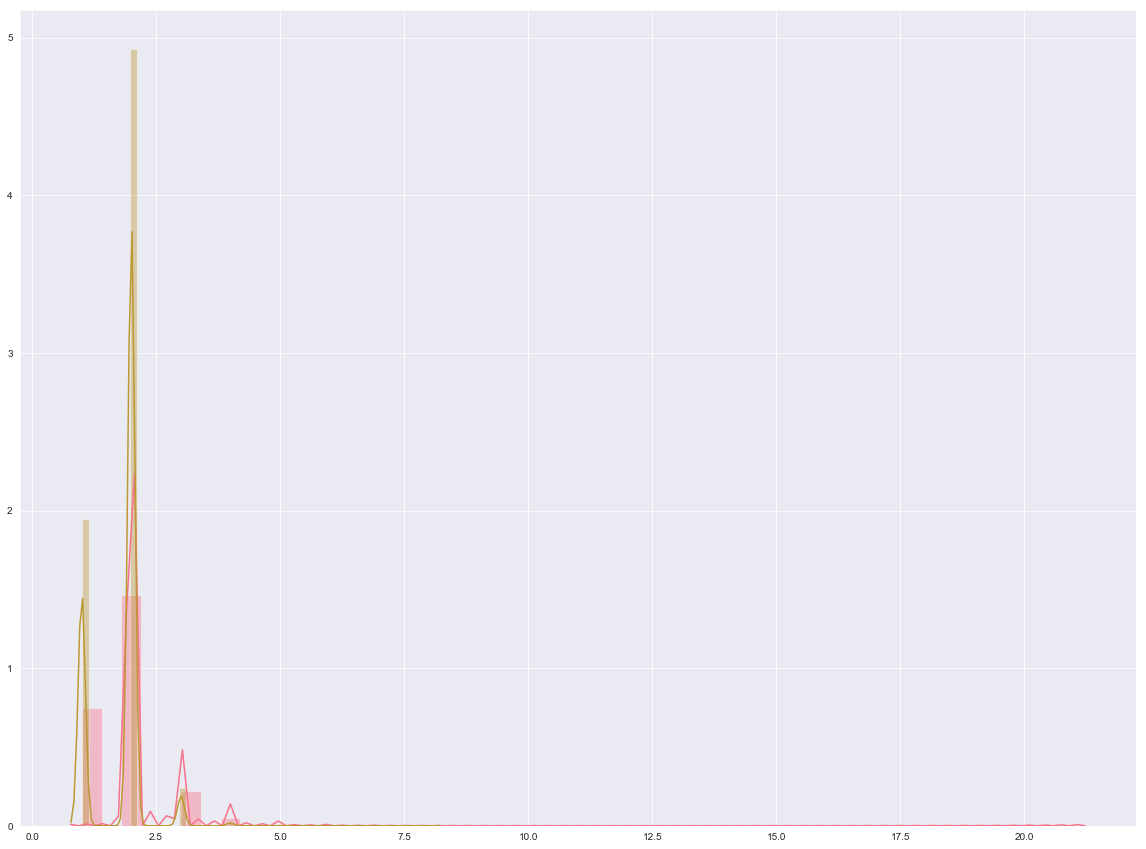

In [147]:
plt.figure(2, figsize=(20,15))
sns.distplot(df_acc.loc[df_acc.Did_Police_Officer_Attend_Scene_of_Accident == 1,
                        ['Number_of_Vehicles']],bins=50,label="Attended")
sns.distplot(df_acc.loc[df_acc.Did_Police_Officer_Attend_Scene_of_Accident == 0,
                        ['Number_of_Vehicles']],bins=50,label='Not Attended')

(-1, 10)

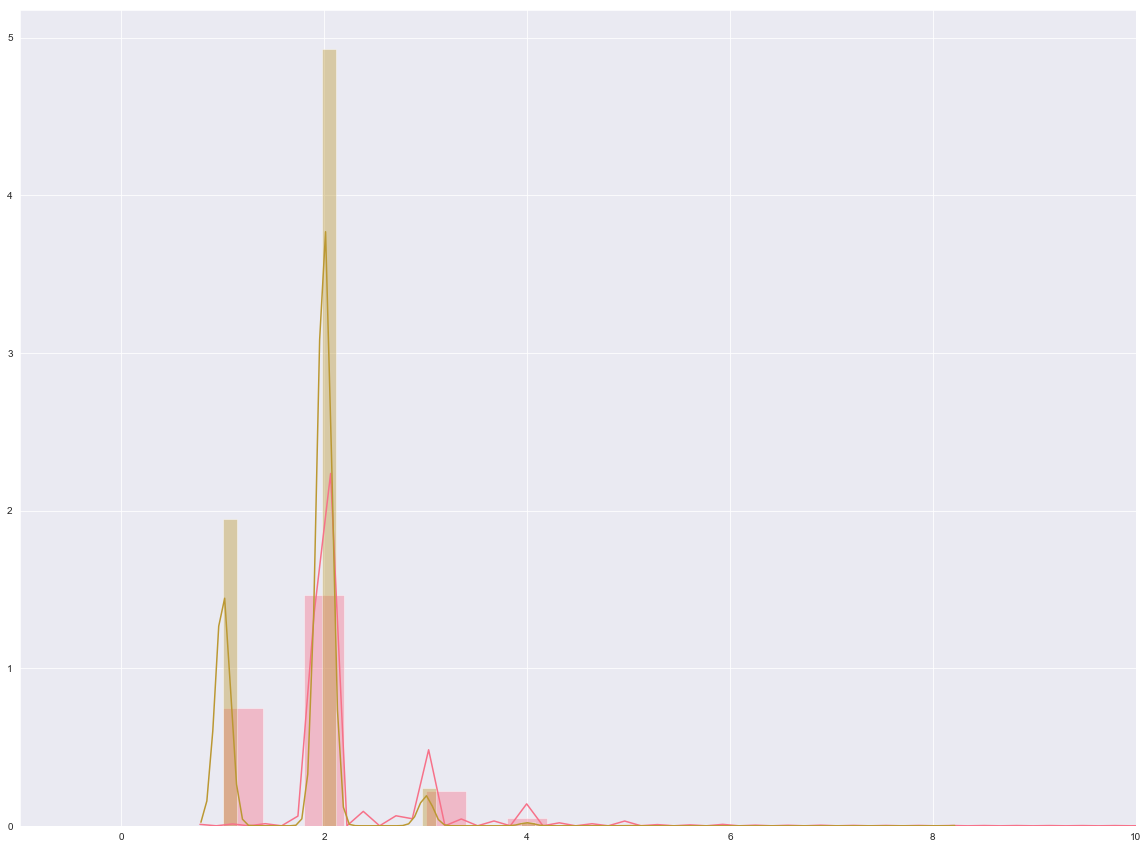

In [148]:
plt.figure(2, figsize=(20,15))
sns.distplot(df_acc.loc[df_acc.Did_Police_Officer_Attend_Scene_of_Accident == 1,
                        ['Number_of_Vehicles']],bins=50,label="Attended")
sns.distplot(df_acc.loc[df_acc.Did_Police_Officer_Attend_Scene_of_Accident == 0,
                        ['Number_of_Vehicles']],bins=50,label='Not Attended')
plt.xlim(-1, 10)

#### 1st_Road_Class

,1st_Road_Class,Did_Police_Officer_Attend_Scene_of_Accident,Accident_Index
0,A,NO,11024
1,A,YES,56804
2,A(M),NO,30
3,A(M),YES,354
4,B,NO,3254
5,B,YES,15319
6,C,NO,2380
7,C,YES,10589
8,Motorway,NO,389
9,Motorway,YES,4857


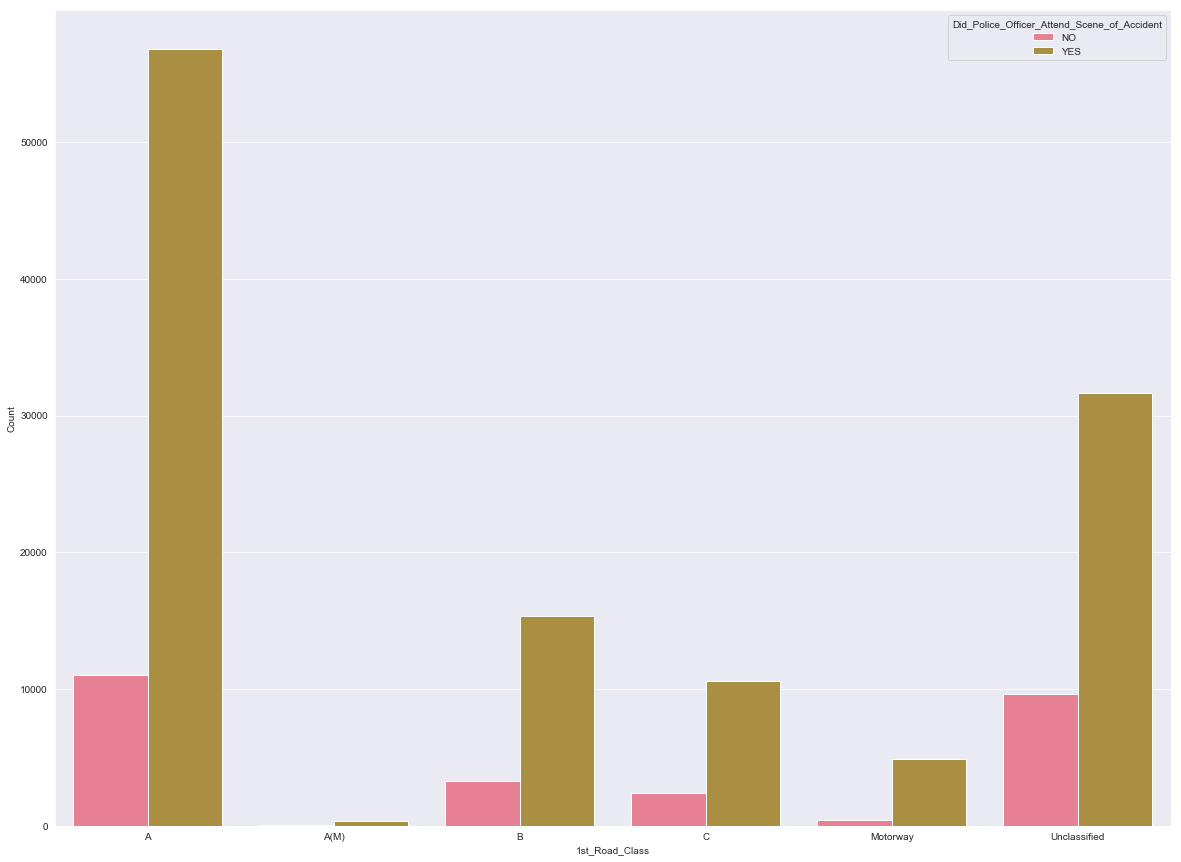

In [150]:
road_by_attend=df_acc.replace({'1st_Road_Class':
                               {1:'Motorway',2:'A(M)',3:'A',4:'B',5:'C',6:'Unclassified'},
              'Did_Police_Officer_Attend_Scene_of_Accident':{0:'NO',1:'YES'}})[
    ['1st_Road_Class','Did_Police_Officer_Attend_Scene_of_Accident','Accident_Index']].groupby(
      ['1st_Road_Class','Did_Police_Officer_Attend_Scene_of_Accident']).count().reset_index()

plt.figure(2, figsize=(20,15))
sns.barplot(x='1st_Road_Class', y='Accident_Index', 
            hue ='Did_Police_Officer_Attend_Scene_of_Accident',
            data=road_by_attend)
plt.ylabel("Count")

road_by_attend

#### Road_Type

,Road_Type,Did_Police_Officer_Attend_Scene_of_Accident,Accident_Index
0,Dual carriageway,NO,2664
1,Dual carriageway,YES,18159
2,One way street,NO,790
3,One way street,YES,2145
4,Roundabout,NO,2628
5,Roundabout,YES,7701
6,Single carriageway,NO,20187
7,Single carriageway,YES,90000
8,Slip road,NO,256
9,Slip road,YES,1286


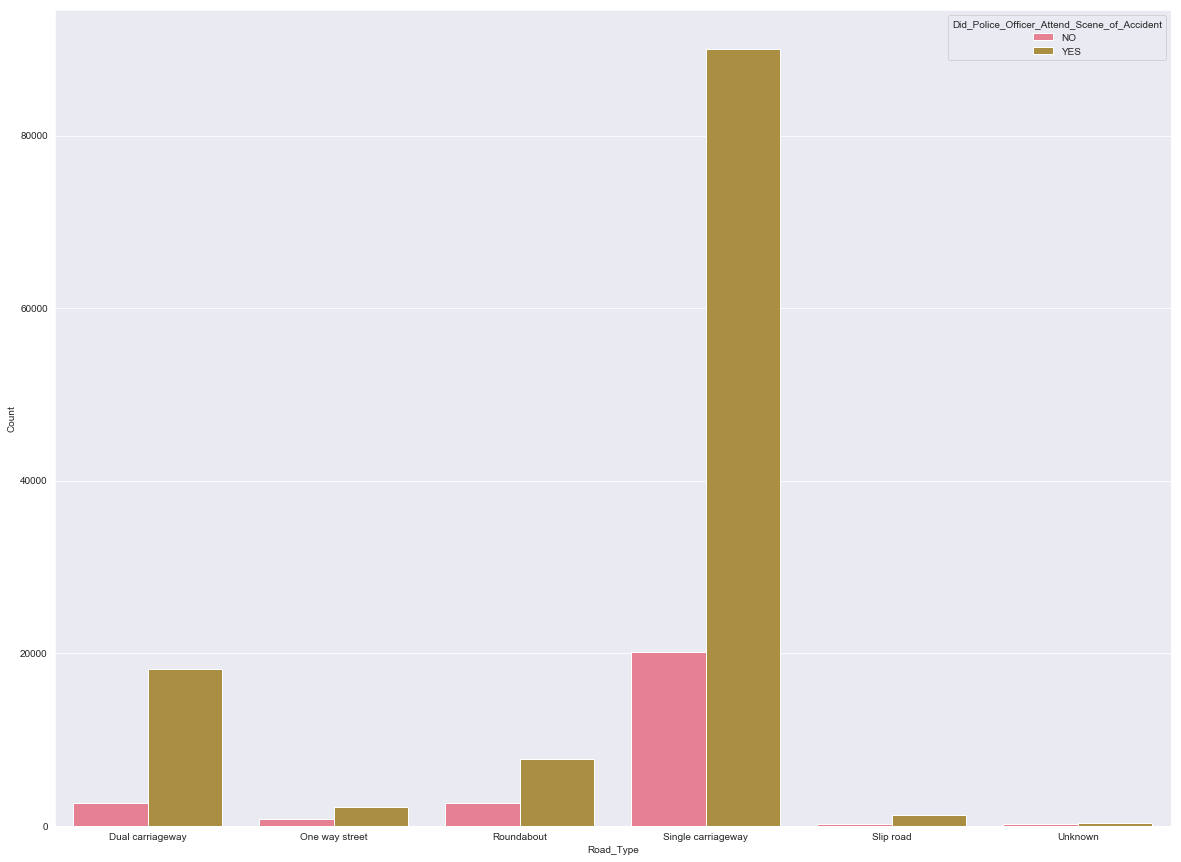

In [152]:
roadtype_by_attend=df_acc.replace({'Road_Type':
                               {1:'Roundabout',2:'One way street',3:'Dual carriageway',
                                6:'Single carriageway',7:'Slip road',9:'Unknown',
                                12:'One way street/Slip road'},
              'Did_Police_Officer_Attend_Scene_of_Accident':{0:'NO',1:'YES'}})[
    ['Road_Type','Did_Police_Officer_Attend_Scene_of_Accident','Accident_Index']].groupby(
      ['Road_Type','Did_Police_Officer_Attend_Scene_of_Accident']).count().reset_index()

plt.figure(2, figsize=(20,15))
sns.barplot(x='Road_Type', y='Accident_Index', 
            hue ='Did_Police_Officer_Attend_Scene_of_Accident',
            data=roadtype_by_attend)
plt.ylabel("Count")

roadtype_by_attend

#### Speed_limit

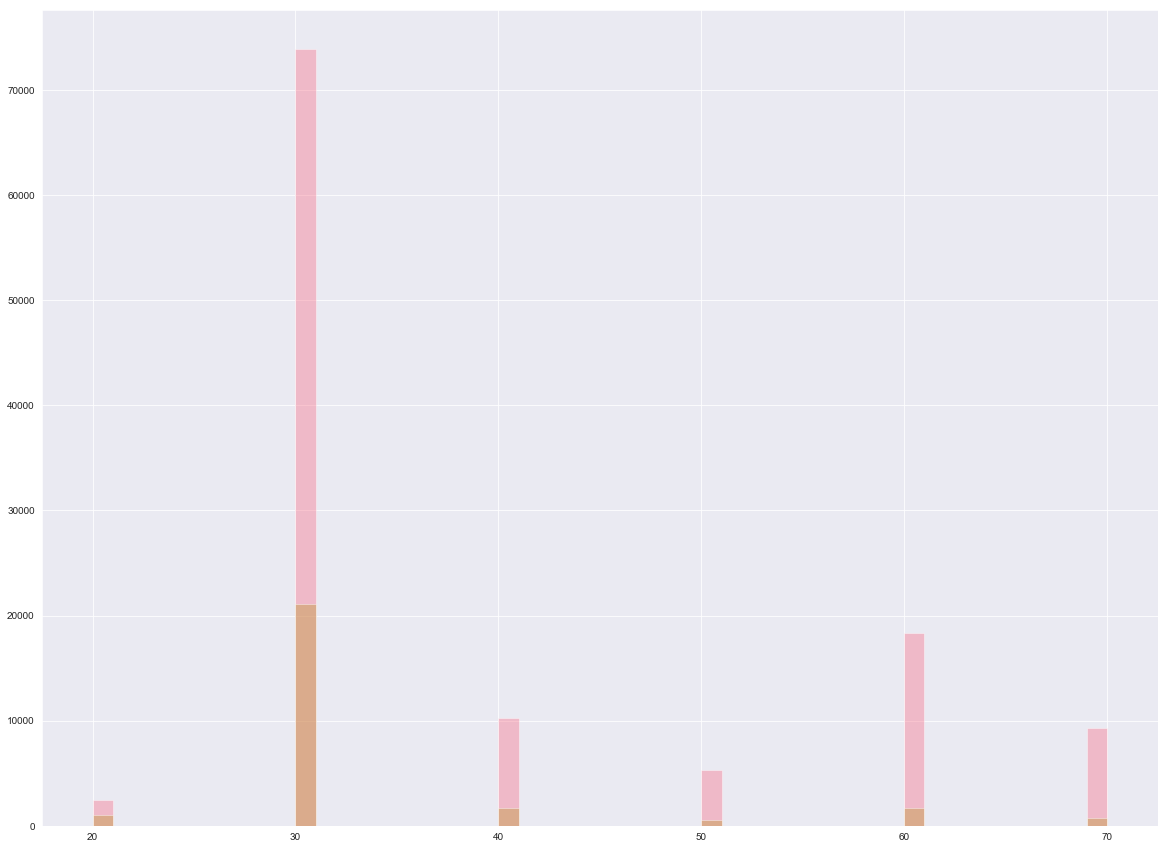

In [161]:
plt.figure(2, figsize=(20,15))
sns.distplot(df_acc.loc[df_acc.Did_Police_Officer_Attend_Scene_of_Accident == 1,
                        ['Speed_limit']],bins=50,kde=False,label="Attended")
sns.distplot(df_acc.loc[df_acc.Did_Police_Officer_Attend_Scene_of_Accident == 0,
                        ['Speed_limit']],bins=50,kde=False,label='Not Attended')
# plt.xlim(-1, 10)


In [158]:
df_acc.Speed_limit.unique()

array([30, 40, 20, 50, 70, 60])